Завдання 3.
Розробити згорткову нейронну мережу для розпізнавання
зображень датасету
cifar_10 . Підібр ати оптимальну кількість ш арів, функції активації, кількі ть
епох навчання, розмір bath_size . Навчити модель. Розра х увати функцію втрат
і точності. Побудувати відповідн і графіки . Візуалізувати результати . Зробити
висновки.
Зверніть увагу , що згорткова модель довго навчається, то му кр аще брати
кількість епох до 10. (10

Epoch 1/10
782/782 - 39s - loss: 1.5820 - accuracy: 0.4229 - val_loss: 1.2973 - val_accuracy: 0.5395 - 39s/epoch - 50ms/step
Epoch 2/10
782/782 - 34s - loss: 1.2120 - accuracy: 0.5708 - val_loss: 1.1982 - val_accuracy: 0.5730 - 34s/epoch - 44ms/step
Epoch 3/10
782/782 - 31s - loss: 1.0690 - accuracy: 0.6240 - val_loss: 1.1228 - val_accuracy: 0.6103 - 31s/epoch - 40ms/step
Epoch 4/10
782/782 - 34s - loss: 0.9750 - accuracy: 0.6587 - val_loss: 0.9717 - val_accuracy: 0.6644 - 34s/epoch - 43ms/step
Epoch 5/10
782/782 - 33s - loss: 0.9060 - accuracy: 0.6866 - val_loss: 0.9605 - val_accuracy: 0.6725 - 33s/epoch - 42ms/step
Epoch 6/10
782/782 - 32s - loss: 0.8434 - accuracy: 0.7057 - val_loss: 0.9221 - val_accuracy: 0.6850 - 32s/epoch - 41ms/step
Epoch 7/10
782/782 - 31s - loss: 0.7992 - accuracy: 0.7232 - val_loss: 0.8891 - val_accuracy: 0.6972 - 31s/epoch - 39ms/step
Epoch 8/10
782/782 - 31s - loss: 0.7544 - accuracy: 0.7377 - val_loss: 0.9000 - val_accuracy: 0.7031 - 31s/epoch - 39ms/step


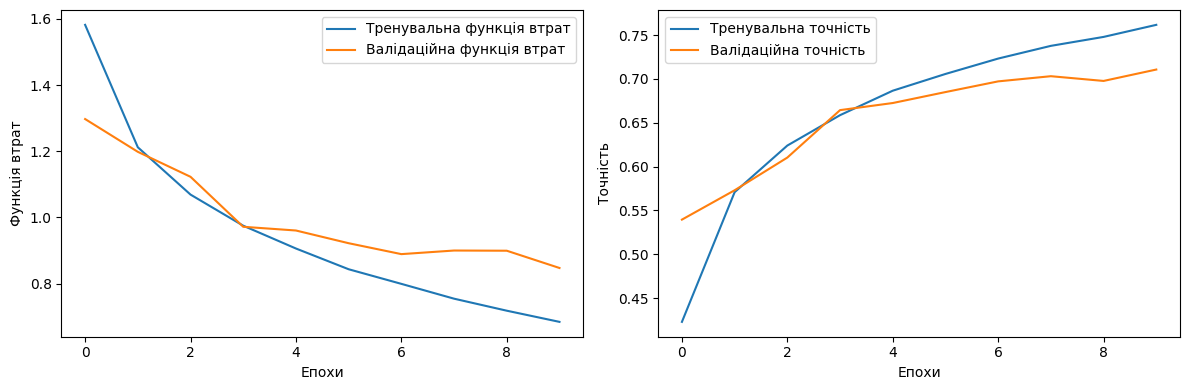

313/313 - 2s - loss: 0.8472 - accuracy: 0.7107 - 2s/epoch - 7ms/step

Тестова функція втрат: 0.8472
Тестова точність: 0.7107


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Функція для побудови та навчання моделі
def build_and_train_model(num_layers, activation_func, batch_size, num_epochs):
    model = models.Sequential()
    
    # Додавання згорткових шарів
    model.add(layers.Conv2D(32, (3, 3), activation=activation_func, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    for _ in range(num_layers - 1):
        model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Додавання повнозв'язних шарів
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_func))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(test_images, test_labels), verbose=2)
    
    return model, history

# Задання параметрів
num_layers = 3
activation_func = 'relu'
batch_size = 64
num_epochs = 10

# Побудова та навчання моделі
model, history = build_and_train_model(num_layers, activation_func, batch_size, num_epochs)

# Відображення графіків
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальна функція втрат')
plt.plot(history.history['val_loss'], label='Валідаційна функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Функція втрат')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.tight_layout()
plt.show()

# Оцінка моделі на тестових даних
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТестова функція втрат: {test_loss:.4f}')
print(f'Тестова точність: {test_accuracy:.4f}')
